In [ ]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#importing main dataset
df = pd.read_csv(r'C:\Users\Kishor\Downloads\dataset\covid_19_india.csv', parse_dates=['Date'], dayfirst=True)

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
#keeping only required columns of 
df = df[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed']] 
#renaming column names of columns 
df.columns = ['date', "state", "cured", "deaths", "confirmed"]

In [5]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [6]:
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [7]:
today = df[df.date == '2020-07-17']

In [8]:
today

,date,state,cured,deaths,confirmed
4179,2020-07-17,Andaman and Nicobar Islands,133,0,180
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4181,2020-07-17,Arunachal Pradesh,153,3,543
4182,2020-07-17,Assam,12888,48,19754
4183,2020-07-17,Bihar,14018,197,21764
4184,2020-07-17,Chandigarh,476,11,651
4185,2020-07-17,Chhattisgarh,3451,21,4732
4186,2020-07-17,Dadra and Nagar Haveli and Daman and Diu,371,2,552
4187,2020-07-17,Delhi,97693,3545,118645
4188,2020-07-17,Goa,1817,19,3108


In [9]:
#Sorting data w.r.t number of confirmed cases
max_confirmed_cases=today.sort_values(by="confirmed", ascending=False)
max_confirmed_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4194,2020-07-17,Karnataka,19729,1032,51422
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4209,2020-07-17,Telengana,27295,396,41018
4180,2020-07-17,Andhra Pradesh,19393,492,38044
4213,2020-07-17,West Bengal,21415,1023,36117
4206,2020-07-17,Rajasthan,19970,538,27174


In [10]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:10]

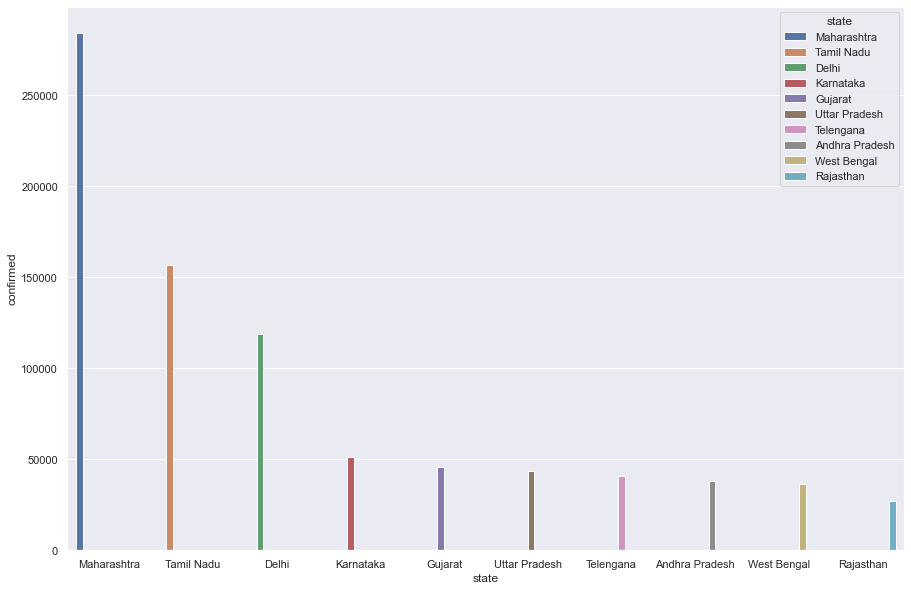

In [11]:
#Making bar plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state", y="confirmed", data=top_states_confirmed, hue="state")
plt.show()

In [12]:
#sorting data w.r.t number of death cases
max_death_cases=today.sort_values(by="deaths", ascending=False)
max_death_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4187,2020-07-17,Delhi,97693,3545,118645
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4189,2020-07-17,Gujarat,32103,2089,45481
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4194,2020-07-17,Karnataka,19729,1032,51422
4213,2020-07-17,West Bengal,21415,1023,36117
4197,2020-07-17,Madhya Pradesh,14127,689,20378
4206,2020-07-17,Rajasthan,19970,538,27174
4180,2020-07-17,Andhra Pradesh,19393,492,38044


In [13]:
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:10]

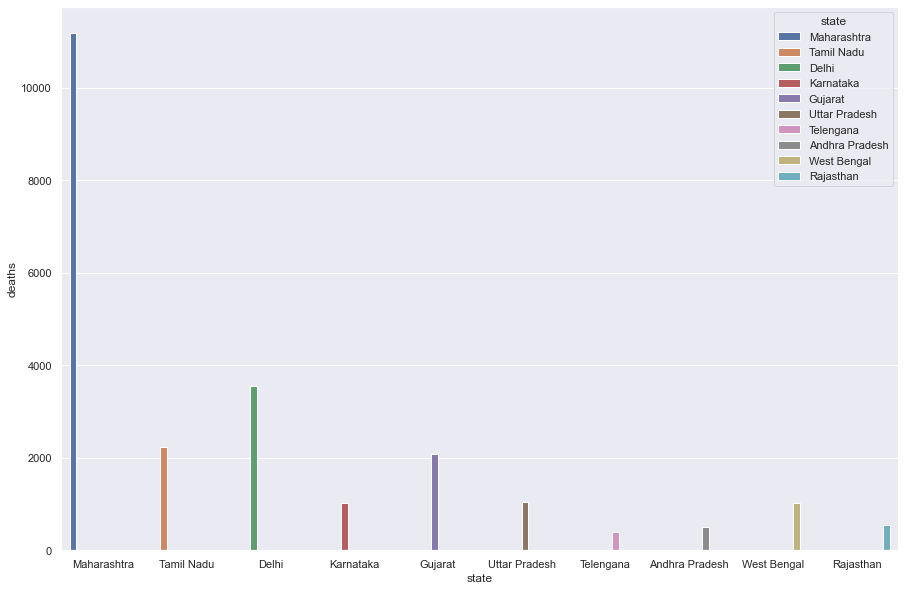

In [14]:
#Making bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state", y="deaths", data=top_states_confirmed, hue="state")
plt.show()

In [15]:
#Sorting data w.r.t number of cured cases
max_cured_cases=today.sort_values(by="cured", ascending=False)
max_cured_cases

,date,state,cured,deaths,confirmed
4198,2020-07-17,Maharashtra,158140,11194,284281
4208,2020-07-17,Tamil Nadu,107416,2236,156369
4187,2020-07-17,Delhi,97693,3545,118645
4189,2020-07-17,Gujarat,32103,2089,45481
4209,2020-07-17,Telengana,27295,396,41018
4212,2020-07-17,Uttar Pradesh,26675,1046,43441
4213,2020-07-17,West Bengal,21415,1023,36117
4206,2020-07-17,Rajasthan,19970,538,27174
4194,2020-07-17,Karnataka,19729,1032,51422
4180,2020-07-17,Andhra Pradesh,19393,492,38044


In [16]:
#Getting states with maximum number of cured cases
top_states_cured=max_cured_cases[0:10]

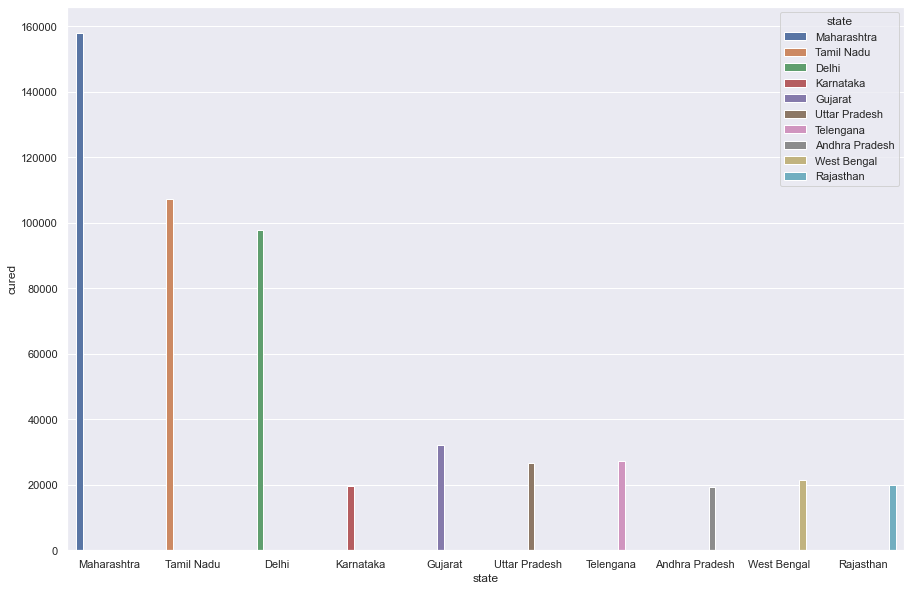

In [17]:
#Making bar-plot for states with top cured cases
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state", y="cured", data=top_states_confirmed, hue="state")
plt.show()

In [18]:
#Maharashtra
maha = df[df.state == 'Maharashtra']

In [19]:
maha

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14
...,...,...,...,...,...
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833


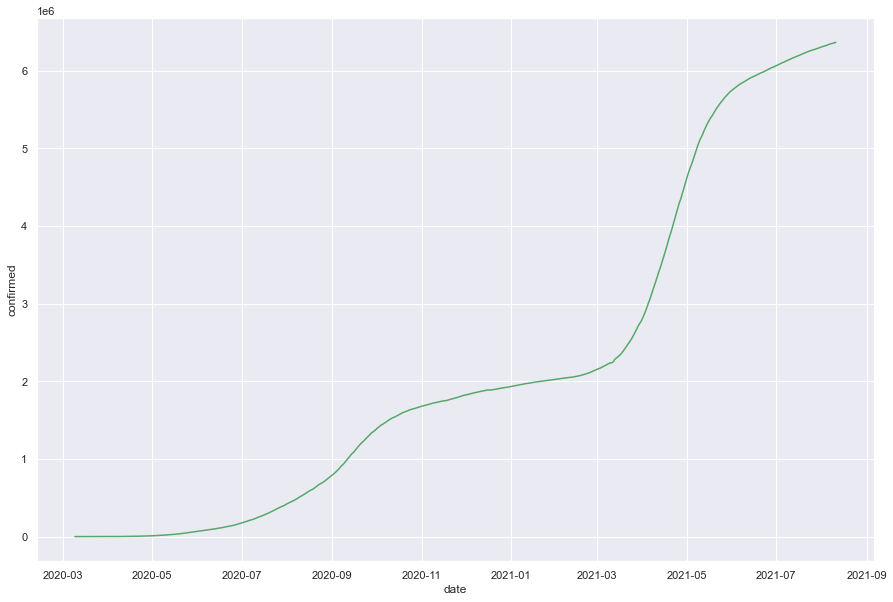

In [20]:
#Visualizing confirmed cases in Maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="confirmed", data=maha, color="g")
plt.show()

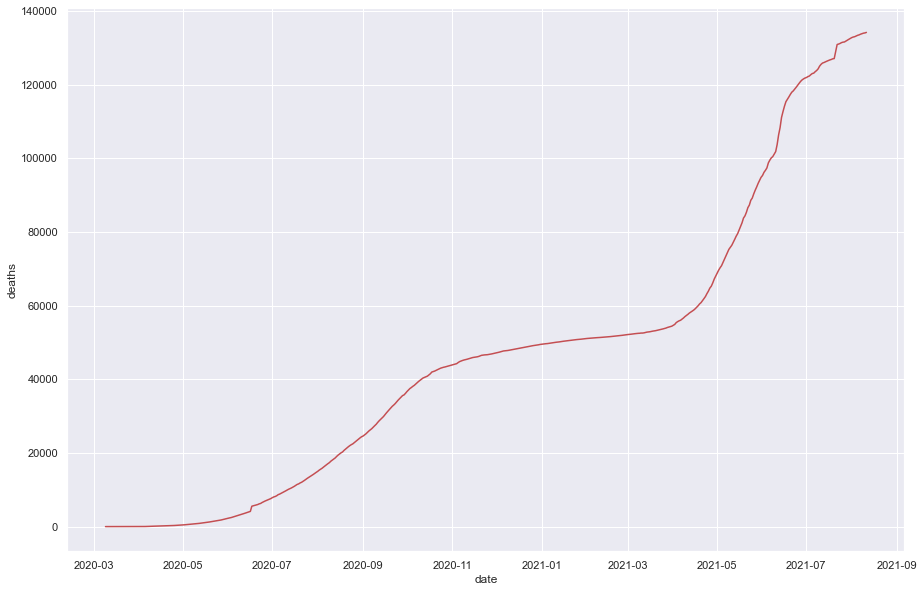

In [21]:
#Visualizing death cases in Maharashtra
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="deaths", data=maha, color="r")
plt.show()

In [22]:
#Kerala
kerala = df[df.state == 'Kerala']
kerala

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574


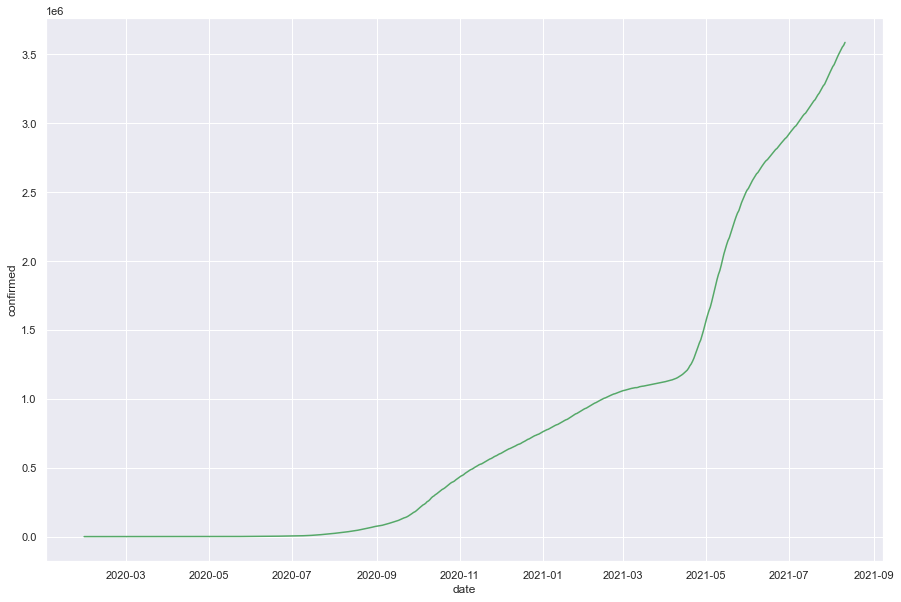

In [23]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="confirmed", data=kerala, color="g")
plt.show()

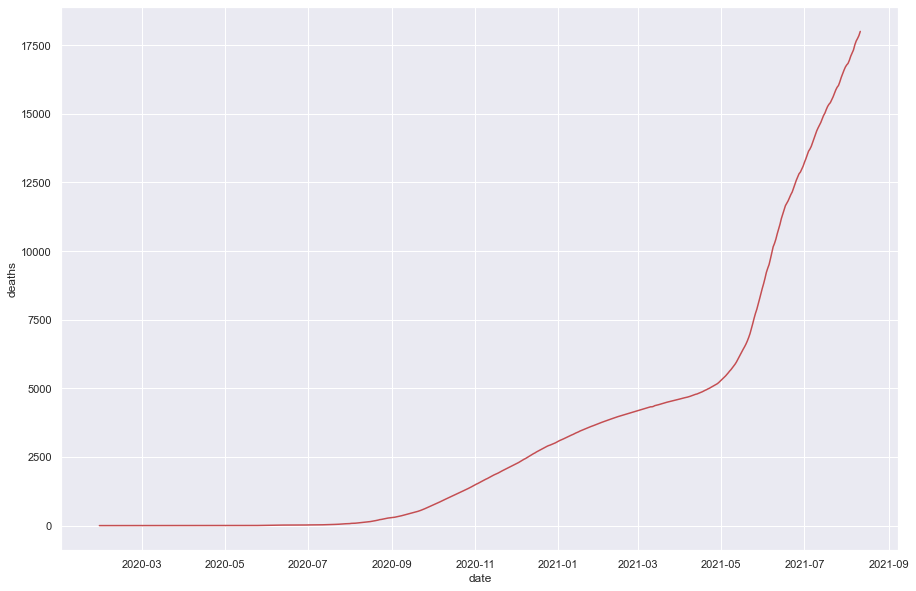

In [24]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="deaths", data=kerala, color="r")
plt.show()

In [25]:
#Jammu and Kashmir
jk = df[df.state == 'Jammu and Kashmir']
jk

,date,state,cured,deaths,confirmed
81,2020-03-09,Jammu and Kashmir,0,0,1
96,2020-03-10,Jammu and Kashmir,0,0,1
106,2020-03-11,Jammu and Kashmir,0,0,1
117,2020-03-12,Jammu and Kashmir,0,0,1
130,2020-03-13,Jammu and Kashmir,0,0,1
...,...,...,...,...,...
17943,2021-08-07,Jammu and Kashmir,316496,4386,322286
17979,2021-08-08,Jammu and Kashmir,316632,4386,322428
18015,2021-08-09,Jammu and Kashmir,316761,4389,322550
18051,2021-08-10,Jammu and Kashmir,316957,4390,322658


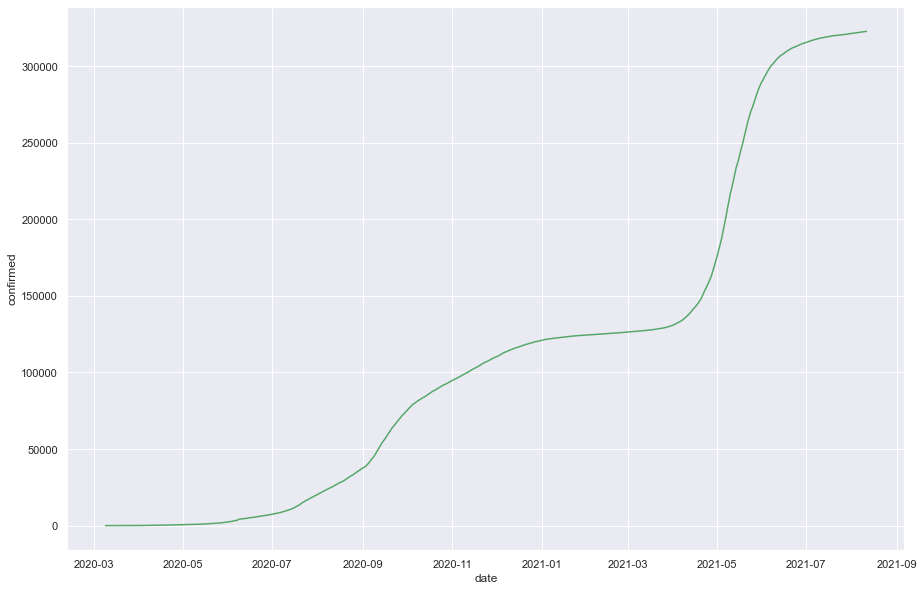

In [26]:
#Visualizing confirmed cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="confirmed", data=jk, color="g")
plt.show()

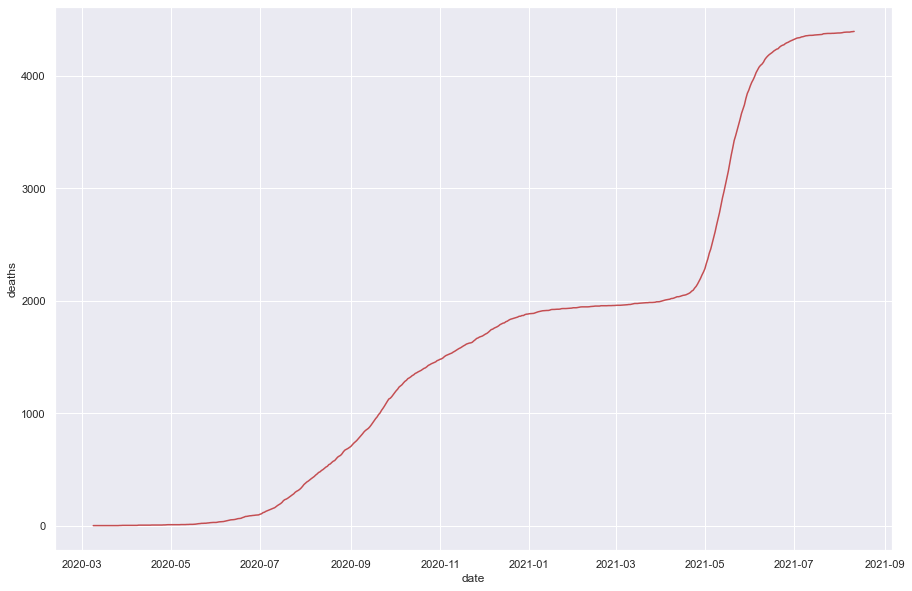

In [27]:
#Visualizing death cases in Kerala
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="date", y="deaths", data=jk, color="r")
plt.show()

In [28]:
#Converting date-time to ordinal
maha['date']=maha['date'].map(dt.datetime.toordinal)
maha

<ipython-input-28-1b68ecba89a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal)


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14
...,...,...,...,...,...
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833


In [29]:
#Linear regression
from sklearn.model_selection import train_test_split

In [30]:
#getting dependant variable and independant variable
x=maha['date']
y=maha['deaths']

In [54]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
y_test

2685      2710
6335     30409
9742     48801
4760     15316
8610     46356
         ...  
1592       548
3334      6283
8540     46102
10210    49666
1208       251
Name: deaths, Length: 104, dtype: int64

In [58]:
x_train

6580     737691
10714    737808
3298     737598
14566    737915
12226    737850
          ...  
9418     737772
380      737510
16906    737980
14854    737923
8505     737746
Name: date, Length: 416, dtype: int64

In [59]:
y_train

6580      33407
10714     50438
3298       6170
14566     71742
12226     52154
          ...  
9418      48139
380           3
16906    124296
14854     78007
8505      46034
Name: deaths, Length: 416, dtype: int64

In [60]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [70]:
maha.head()

,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [75]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [73]:
y_pred = lr.predict(np.array([[737956]]))

In [74]:
y_pred

array([[94267.63826945]])

C:\Users\Kishor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


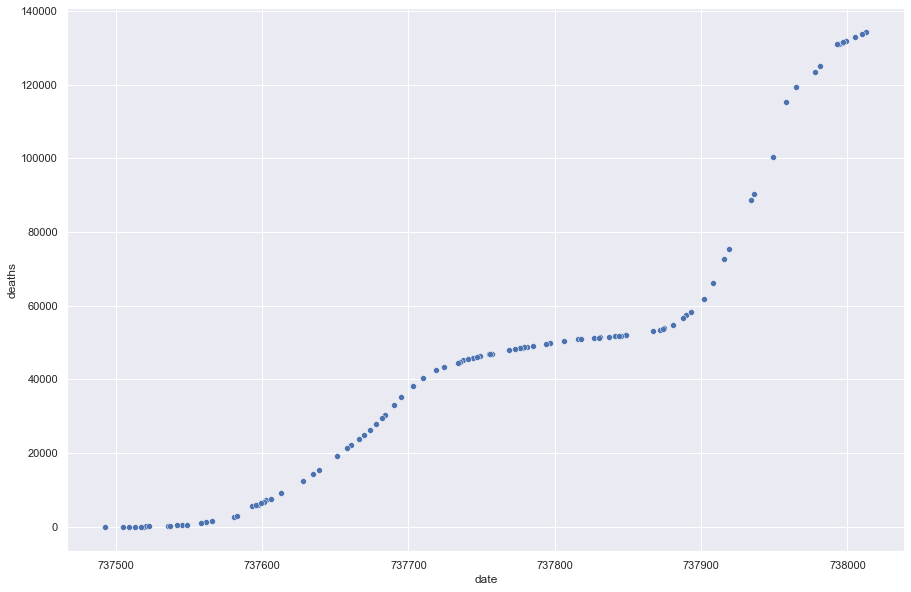

In [65]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x_test, y_test, data=maha, color="b")
plt.show()

In [43]:
#SVM Model

In [44]:
from sklearn.svm  import SVC

In [45]:
#getting dependant variable and independant variable
x=maha['date']
y=maha['deaths']

In [50]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2)

In [51]:
svm = SVC().fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

C:\Users\Kishor\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [52]:
svm_pred = svm.predict(np.array([[738012]]))

In [53]:
svm_pred

array([134064], dtype=int64)